<a href="https://colab.research.google.com/github/elliwadler/image_classification/blob/main/cat_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import urllib.request
import zipfile

# Download the dataset zip file
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
filename = "cats_and_dogs_filtered.zip"
urllib.request.urlretrieve(url, filename)

# Extract the zip file
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall()

url = "https://drive.google.com/file/d/1HZZ9Kw4s8dZA9jN_J0En3p0a41pW2kEX/view?usp=sharing"
filename = "cats_dogs_classifier.h5"
urllib.request.urlretrieve(url, filename)


('cats_dogs_classifier.h5', <http.client.HTTPMessage at 0x7fdcf8090a60>)

In [19]:
import os
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping


In [4]:
train_dir = 'cats_and_dogs_filtered/train'
validation_dir = 'cats_and_dogs_filtered/validation'

# TensorFlow - Klasse: erstellen einer Pipeline für das Lesen von Bildern aus Verzeichnis, Bilder in Echtzeit währen des Trainings verändern (Drehung, Zuschneiden, Spiegeln, ...)
# Erleichtert das Training von Deep-Learning-Modellen mit Bildern, da sie eine effiziente Möglichkeit bietet, eine große Anzahl von Bildern automatisch zu verarbeiten und zu augmentieren.
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [5]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
              metrics=['accuracy'])

In [22]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)


In [23]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs = 100,
      callbacks=[early_stop],
      validation_data=validation_generator,
      validation_steps=50)


Epoch 1/100
100/100 [==============================] - 133s 1s/step - loss: 0.7035 - accuracy: 0.5035 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 135s 1s/step - loss: 0.6943 - accuracy: 0.5100 - val_loss: 0.6899 - val_accuracy: 0.5640
Epoch 3/100
100/100 [==============================] - 134s 1s/step - loss: 0.6707 - accuracy: 0.5825 - val_loss: 0.6675 - val_accuracy: 0.5590
Epoch 4/100
100/100 [==============================] - 134s 1s/step - loss: 0.6434 - accuracy: 0.6260 - val_loss: 0.6159 - val_accuracy: 0.6590
Epoch 5/100
100/100 [==============================] - 131s 1s/step - loss: 0.6246 - accuracy: 0.6445 - val_loss: 0.6485 - val_accuracy: 0.6310
Epoch 6/100
100/100 [==============================] - 136s 1s/step - loss: 0.6031 - accuracy: 0.6670 - val_loss: 0.6124 - val_accuracy: 0.6540
Epoch 7/100
100/100 [==============================] - 137s 1s/step - loss: 0.5631 - accuracy: 0.7045 - val_loss: 0.6035 - val_accuracy:

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 16s 326ms/step


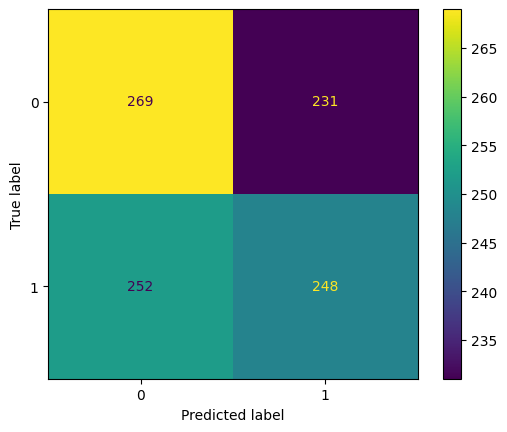

In [61]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the saved model
model = load_model('cats_dogs_classifier.h5')

# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a DirectoryIterator for the test data
test_dir = 'cats_and_dogs_filtered/validation'
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Get the predicted classes for the test data
y_pred_prob = model.predict(test_generator)
y_pred = np.round(y_pred_prob)

# Get the true classes for the test data
y_true = test_generator.classes

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
cm_display = ConfusionMatrixDisplay(cm).plot()

In [44]:
import pandas as pd

history_df = pd.DataFrame(model.history.history)
history_df.to_csv('train_history.csv', index=False)
model.save('cats_dogs_classifier.h5')

In [55]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.models import load_model


# Load the saved model
model = tf.keras.models.load_model('cats_dogs_classifier.h5')

# Load the image and resize to the target size
img_path = '/content/cats_and_dogs_filtered/validation/cats/cat.2003.jpg'
img = image.load_img(img_path, target_size=(150, 150))

# Convert the image to a numpy array and normalize
img_array = image.img_to_array(img)
img_array /= 255.

# Expand the dimensions of the image array to match the model input shape
img_array = np.expand_dims(img_array, axis=0)

# Predict the class of the image
pred = model.predict(img_array)
pred_probability = pred[0][0]

if pred[0][0] > 0.5:
    print("The image is a dog with a probability of {:.2f}%".format(pred_probability * 100))
else:
    print("The image is a cat with a probability of {:.2f}%".format(pred_probability * 100))

1/1 [==============================] - 0s 109ms/step
The image is a cat with a probability of 0.00%
